#### - Sobhan Moradian Daghigh
#### - 12/27/2021
#### - PR - EX02 - Q2 - All Parts

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from PIL import Image
from sklearn.metrics import accuracy_score

### Using the glob for loading the datasets

In [8]:
def load_datas(folder_name):
    x_datasets = []
    y_datasets = []
    
    classes = glob.glob('./inputs/P2/{}/*'.format(folder_name))
    
    for class_ in classes:
        
        traintest = glob.glob('{}/*'.format(class_))
        
        for fldr in traintest:
            x_dataset = []
            y_dataset = []
            
            images = glob.glob('{}/*.PNG'.format(fldr))
            for image in images:
                label = image[-8]
                img = np.array(Image.open(image)).reshape((1, 3600))
                
                x_dataset.append(img[0])
                y_dataset.append(label)               
                
            x_datasets.append(x_dataset)
            y_datasets.append(y_dataset)
            
    return x_datasets, y_datasets

In [9]:
def findPrototype(dataset, label):
    prototypes = []
    for i in range(0, len(set(label))):
        class_ = np.array(dataset)[np.where(np.array(label) == i)]
        
        # Getting avg of the data
        avg = np.sum(class_, 0) / len(class_)
        
        prototypes.append(avg)
        
    return prototypes

In [75]:
def display_prototype(prototypes, group_name):
    print('Group name: {}'.format(group_name))
    for proto in prototypes:
        plot = plt.figure()
        plt.imshow(np.array(proto).reshape((60, 60)), cmap='gray')
        plt.show()

In [76]:
def cal_distance(data, prototypes):
    dists = []
    for proto in prototypes:
        dist = np.linalg.norm(np.array(proto) - np.array(data))
        dists.append(dist)
        
    return dists

In [77]:
def prediction(dataset, prototypes):
    predictions = []
    for ele in dataset:
        dists = cal_distance(ele, prototypes)
        predictions.append(dists.index(min(dists)))
    
    return predictions 

In [78]:
def MDC(train, train_label, test, test_label, group_name):
    prototypes = findPrototype(train, train_label)
    display_prototype(prototypes, group_name)
    predictions = prediction(test, prototypes)
    return accuracy_score(test_label, predictions)

In [79]:
def load_group(folder_name, group_name):
    datasets, labels = load_datas(folder_name)
    if group_name == 'a':
        x_train, y_train = datasets[1], list(map(int, labels[1]))
        x_test , y_test  = datasets[0], list(map(int, labels[0]))
        
    elif group_name == 'b':
        x_train, y_train = datasets[3], list(map(int, labels[3]))
        x_test , y_test  = datasets[2], list(map(int, labels[2]))
        
    elif group_name == 'c':
        x_train, y_train = datasets[5], list(map(int, labels[5]))
        x_test , y_test  = datasets[4], list(map(int, labels[4]))
        
    return x_train, y_train, x_test, y_test

Group name: a


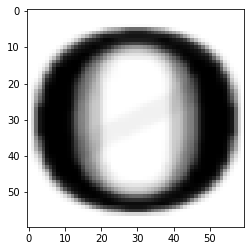

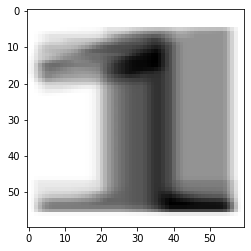


Accuracy of group a using MDC is 1.0
-------------------------------------


Group name: b


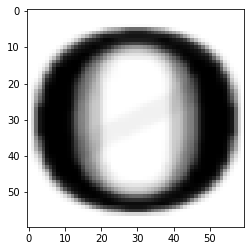

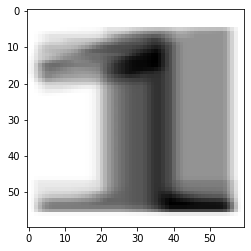

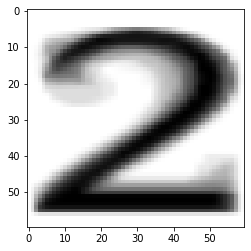

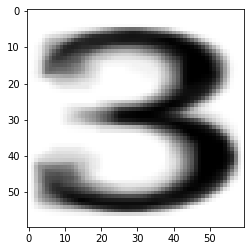


Accuracy of group b using MDC is 1.0
-------------------------------------


Group name: c


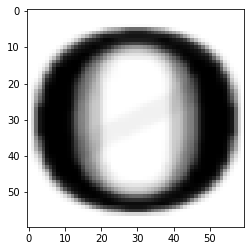

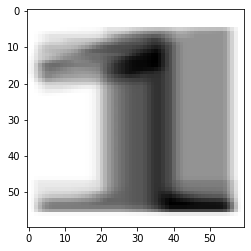

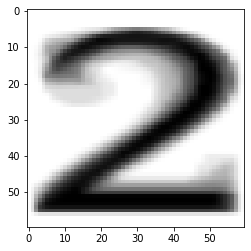

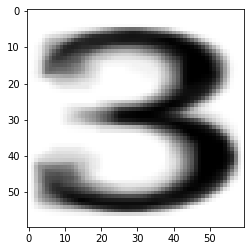

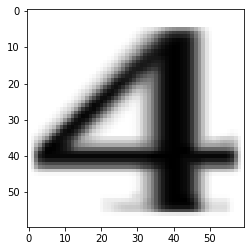

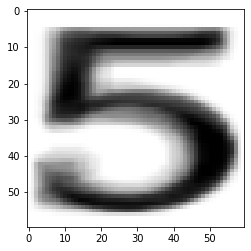

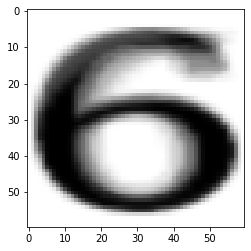

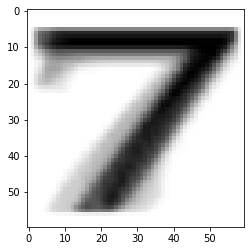

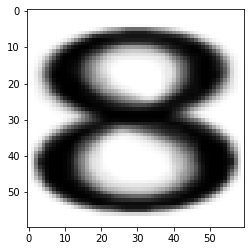

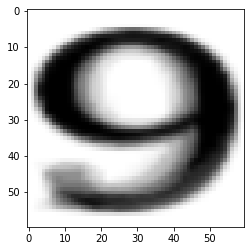


Accuracy of group c using MDC is 0.99
-------------------------------------




In [88]:
for group in ['a', 'b', 'c']:
    print('\nAccuracy of group {} using MDC is {}'.format(group, MDC(*load_group('dataset', group), group)))
    print('-------------------------------------\n\n')

#### Finito